In [2]:
import numpy as np
import pandas as pd
from pymongo import MongoClient
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load the dataset
client = MongoClient("localhost", 27017)
db = client["IF29"]
collec = db.user_label
data = pd.DataFrame(list(collec.find()))

In [4]:
# Define features and target variable
data_removed = data[data["label"] != 1]

# Define features and target variable
features = [
    "verified",
    "friend_nb",
    "listed_nb",
    "follower_nb",
    "favorites_nb",
    "tweet_nb",
    "hash_avg",
    "at_avg",
    "tweet_user_count",
    "tweet_frequency",
    "friend_frequency",
    "visibility",
    "Aggressivity",
]
X = data_removed[features]
y = data_removed["label"]

y_loc = y.iloc[:200000]
X_loc = X.iloc[:200000]

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_loc, y_loc, test_size=0.3, random_state=42)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Create an SVM classifier
svm_classifier = SVC(kernel="linear")

In [8]:
# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

In [10]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14526    18     0]
 [   96 44982     3]
 [    0    50   325]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14544
           1       1.00      1.00      1.00     45081
           2       0.99      0.87      0.92       375

    accuracy                           1.00     60000
   macro avg       0.99      0.95      0.97     60000
weighted avg       1.00      1.00      1.00     60000



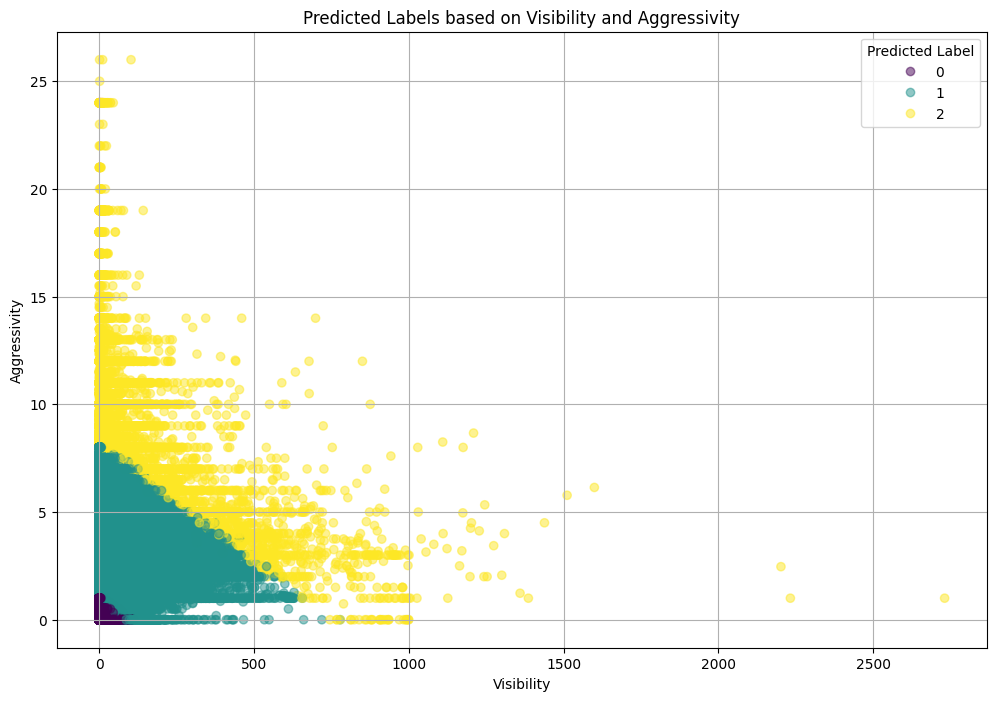

In [11]:
import matplotlib.pyplot as plt

# Préparer les données pour la prédiction
X_full = data[features]
X_full = scaler.transform(X_full)  # Normaliser les données

# Prédire les labels avec le modèle SVM
y_pred_full = svm_classifier.predict(X_full)

# Ajouter les labels prédits au DataFrame
data["predicted_label"] = y_pred_full

# Créer un graphique de visualisation
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data["visibility"], data["Aggressivity"], c=data["predicted_label"], cmap='viridis', alpha=0.5)
plt.xlabel("Visibility")
plt.ylabel("Aggressivity")
plt.title("Predicted Labels based on Visibility and Aggressivity")
plt.legend(*scatter.legend_elements(), title="Predicted Label")
plt.grid(True)
plt.show()

